In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train

array([[-0.74998027, -1.09978744, -0.74158608, ..., -0.6235968 ,
         0.07754241,  0.45062841],
       [-1.02821446, -0.1392617 , -1.02980434, ..., -0.7612376 ,
        -1.07145262, -0.29541379],
       [-0.53852228, -0.29934933, -0.56857428, ..., -0.50470441,
         0.34900827, -0.13371556],
       ...,
       [-1.3214733 , -0.20855336, -1.3143845 , ..., -0.98621857,
        -0.69108476, -0.13148524],
       [-1.24245479, -0.23244704, -1.27759928, ..., -1.7562754 ,
        -1.55125275, -1.01078909],
       [-0.74441558,  1.13188181, -0.72016173, ..., -0.28490593,
        -1.2308599 ,  0.20083251]])

In [10]:
X_test

array([[-0.21855296,  0.31710749, -0.14938447, ...,  1.36998461,
         1.0939611 ,  1.51560644],
       [-0.27141746,  1.44727832, -0.33290634, ..., -0.84095647,
        -0.70686766, -0.88310324],
       [-0.04604776, -0.84412512, -0.11098232, ..., -0.50394228,
        -1.19298094, -0.92659449],
       ...,
       [-0.13230036, -0.12253613, -0.14574637, ...,  0.20087616,
        -0.06766026,  0.36754897],
       [-0.24637638,  0.56799108, -0.28682376, ..., -0.90055508,
        -0.40225771, -0.95558866],
       [-1.35013142,  0.65639767, -1.34712739, ..., -1.36545479,
        -0.72107227, -0.54576727]])

In [11]:
X_train.shape

(398, 30)

## Perform PCA for all components first

In [12]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_train)
X_pca

array([[-2.17650596e+00,  1.25618056e+00, -7.92598012e-01, ...,
         3.10403125e-02,  3.01245684e-02,  2.87669776e-03],
       [-3.55565312e+00,  8.69992599e-01,  2.40337235e-01, ...,
         4.89829106e-03,  4.63640003e-03,  2.39757398e-03],
       [-2.41910268e+00, -2.42748983e-02, -7.78809805e-01, ...,
        -1.41453023e-02,  8.22867552e-03,  1.11997855e-03],
       ...,
       [-3.21623630e+00,  5.39811811e-01,  4.67434736e-01, ...,
         3.83485159e-02, -4.10938852e-02,  1.60833867e-02],
       [-5.72095067e+00, -5.71962200e-01,  3.84995071e+00, ...,
         1.43256901e-02, -1.58915289e-02,  4.65008288e-03],
       [-1.06325950e+00,  1.39453316e+00,  1.17698027e+00, ...,
        -1.22708662e-02, -2.05899378e-03, -1.13135167e-02]])

In [13]:
a=np.cumsum(pca.explained_variance_ratio_*100)
print(a)

[ 43.6893153   63.10447787  72.76602271  79.48263346  84.98146379
  88.99372097  91.17678913  92.66601514  94.04012341  95.14149471
  96.18975759  97.10597184  97.87227789  98.38650422  98.7061394
  98.95810785  99.150523    99.31636722  99.46539397  99.57217128
  99.6738965   99.75879198  99.83314125  99.89127082  99.94569309
  99.97104764  99.99248621  99.99711588  99.99962747 100.        ]


## Plot the graph explaining cumulative variance

Text(0, 0.5, 'Cumulative Explained Variance')

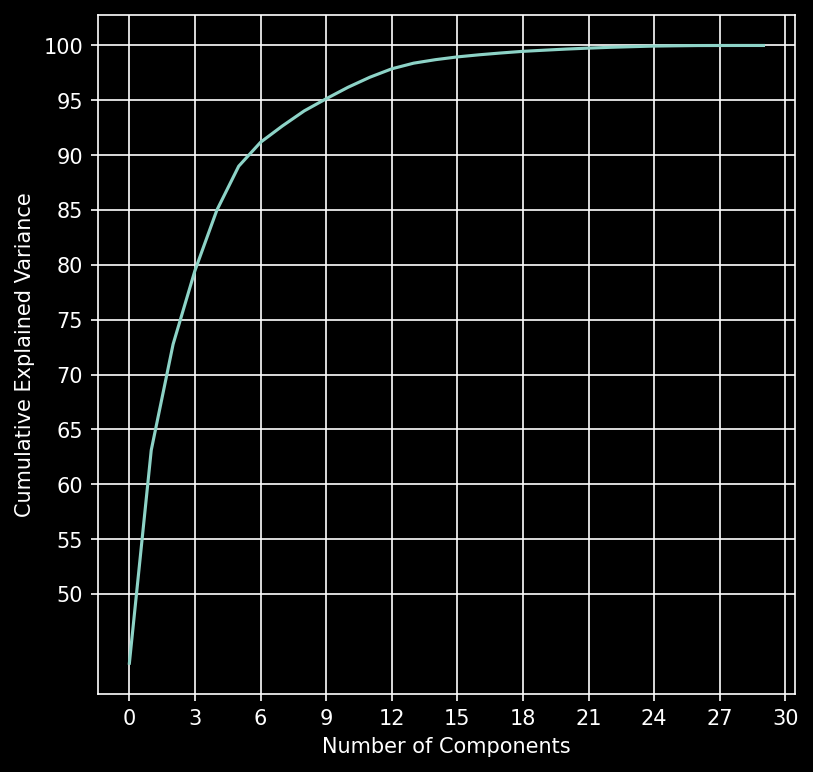

In [19]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.plot(a)
plt.grid()
plt.yticks(np.arange(50, 105, 5))
plt.xticks(np.arange(0, 33, 3))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Taking the components accounting with 95% variability of the dataset

In [15]:
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_train)

In [16]:
X_pca_95.shape

(398, 10)

Text(0.5, 1.0, '95% Explained Variance')

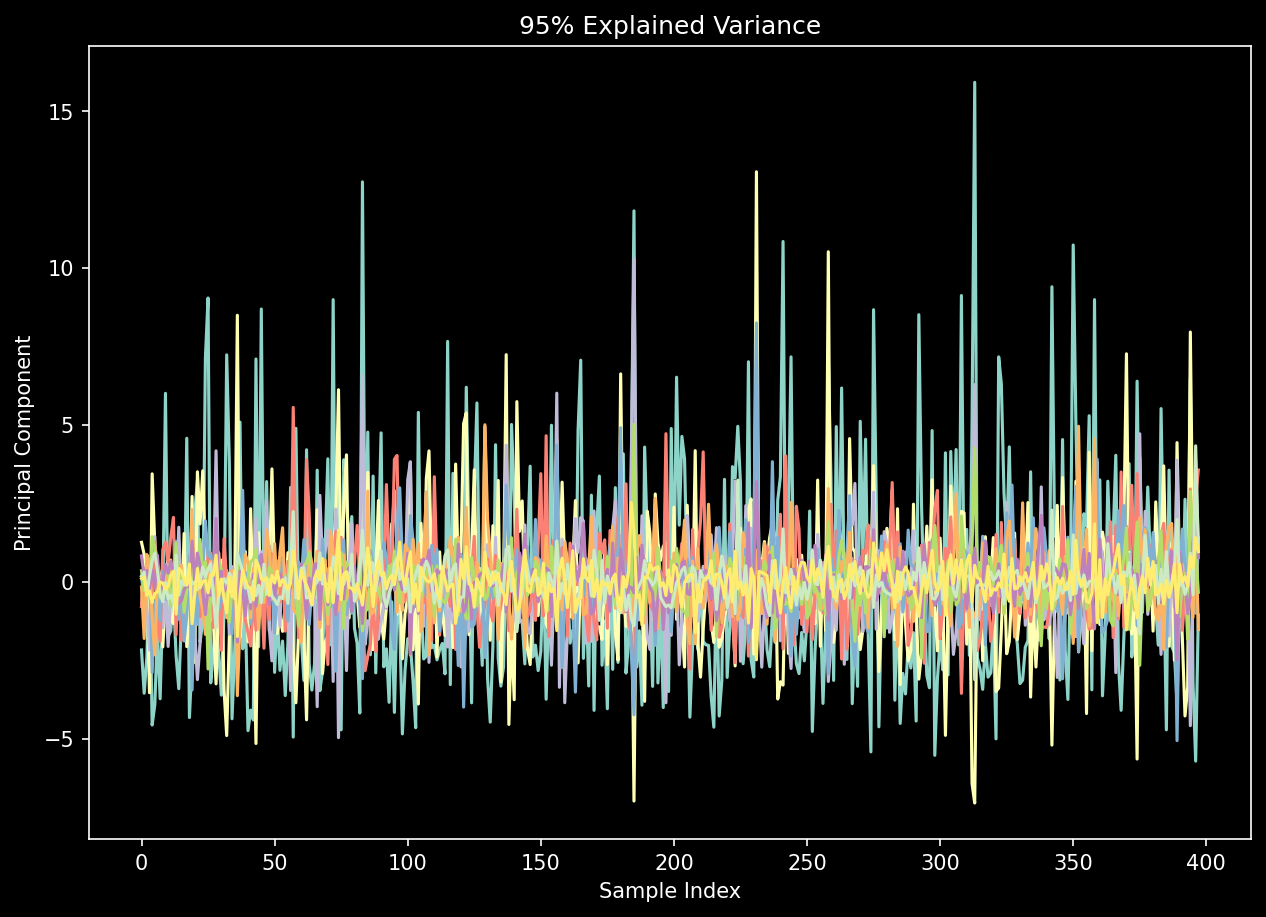

In [17]:
plt.figure(figsize=(10, 7), dpi=150)
plt.plot(X_pca_95)
plt.xlabel('Sample Index')
plt.ylabel('Principal Component')
plt.title('95% Explained Variance')

## New Dataset

In [18]:
df_new = pd.DataFrame(X_pca_95, columns=['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5', 'PCA 6', 'PCA 7', 'PCA 8', 'PCA 9', 'PCA 10'])
df_new['target'] = y_train
df_new.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,target
0,-2.176506,1.256181,-0.792598,-0.788587,0.170341,-0.170074,0.351871,0.823144,0.178090,0.099314,1
1,-3.555653,0.869993,0.240337,0.420622,-0.603194,-1.811573,-0.281572,0.170686,0.309333,0.152410,1
2,-2.419103,-0.024275,-0.778810,-0.036293,-0.081180,0.866981,0.085853,0.359741,-0.422644,-0.428736,1
3,0.372191,-3.539135,-2.178785,-0.407424,0.724539,0.542518,-0.517974,-0.240649,0.180726,-0.293474,0
4,-4.570814,3.441003,-0.148568,-0.888587,-2.895017,-1.186938,1.435464,0.364515,0.678298,-0.665067,1
